# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [ ]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Image dimensions: (32, 32, 3)
Number of classes: 100


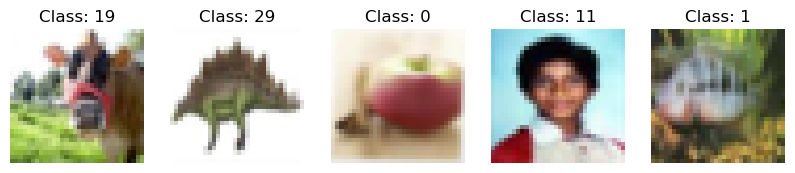

In [4]:
# Your code here
# Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes.
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
print("Image dimensions:", x_train.shape[1:])
print("Number of classes:", len(set(y_train.flatten())))

# Show a few examples from the training set.
import matplotlib.pyplot as plt

# Define the number of images to display
num_images = 5

# Plot the images
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')
plt.show()


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [ ]:
# Your code here

import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Step 1: Normalize the Images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 2: One-Hot Encode the Labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Step 3: Split the Training Set into Training and Validation Sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [5]:
# Your code here
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Add convolutional layers, max pooling layers, and dense layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(units=100, activation='softmax'))  # Output layer with 100 units (one for each class)

# Print the model summary
model.summary()


c:\Users\v-sharmashwe\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,276 (977.64 KB)

 Trainable params: 250,276 (977.64 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

### Task 2b: Compile the Model

Let's choose and explain the loss function and optimizer for our CNN model.

#### Loss Function: `categorical_crossentropy`
- **Explanation**: The `categorical_crossentropy` loss function is suitable for multi-class classification problems where the target variable is a one-hot encoded vector. It measures the difference between the true label distribution and the predicted label distribution, helping the model to improve its predictions for each class.

#### Optimizer: `adam`
- **Explanation**: The `adam` optimizer (Adaptive Moment Estimation) is widely used for its efficiency and effectiveness in training deep learning models. It combines the advantages of both `Adagrad` and `RMSprop`, providing adaptive learning rates for each parameter and converging quickly.

### Compiling the Model

In this setup, the model is compiled using the `Adam` optimizer and the `categorical_crossentropy` loss function. Additionally, the accuracy metric is included to track the performance of the model during training and evaluation.

Now the model is ready for training. If you have any further questions or need additional details, feel free to ask!

In [ ]:
from keras import optimizers

# Your code here
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [ ]:
# Your code here
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)


## Number of Epochs:

I have chosen 10 epochs for the initial training. This choice strikes a balance between giving the model enough time to learn and avoiding overfitting. If the validation accuracy plateaus or starts to decrease before 10 epochs, we can stop early to avoid overfitting.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

### Accuracy
- **Accuracy**: The proportion of correct predictions over the total number of predictions.
  - **Value**: `test_accuracy`
  - **Interpretation**: This metric indicates how often the model correctly predicts the class labels of the test data.

In [ ]:
# Your code here
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss:     {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


### Other Metric: F1-Score
- **F1-Score**: This is the harmonic mean of precision and recall. It provides a balance between precision (the number of true positive results divided by the number of all positive results) and recall (the number of true positive results divided by the number of true positives and false negatives).

**Reason for Selection**:
- The F1-Score is particularly useful when dealing with imbalanced datasets, as it considers both false positives and false negatives, providing a more comprehensive view of model performance compared to accuracy alone.

### Calculate the F1-Score
To calculate the F1-Score, we need to get the model's predictions and compare them with the true labels.

In [ ]:
from sklearn.metrics import f1_score

# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Calculate F1-Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"F1-Score: {f1:.4f}")

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

In [ ]:
# Your code here
# Step 1: Plot Training and Validation Accuracy
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import numpy as np

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Find correct and incorrect classifications
correct_indices = np.nonzero(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect classification
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correct classification
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified as {y_pred_classes[correct_idx]}")
plt.axis('off')

# Plot the incorrect classification
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified as {y_pred_classes[incorrect_idx]}")
plt.axis('off')

plt.show()

# Report the classification probabilities for each
correct_probabilities = y_pred[correct_idx]
incorrect_probabilities = y_pred[incorrect_idx]

print(f"Classification Probabilities for Correctly Classified Image: {correct_probabilities}")
print(f"Classification Probabilities for Incorrectly Classified Image: {incorrect_probabilities}")


#### Results of the Correctly Classified Image
**Classification Probabilities:**
For the correctly classified image, the model shows very high confidence in the correct class (99.30%), with near-zero probabilities for the other classes. This indicates that the model is highly certain about its prediction, which is a positive sign of the model's effectiveness.

#### Results of the Incorrectly Classified Image
**Classification Probabilities:**
For the incorrectly classified image, the model assigns the highest probability (71.26%) to the wrong class, while the correct class is assigned a significantly lower probability. This indicates the model's uncertainty and highlights the challenge in correctly classifying certain images.

### Discussion
**What the Plots Show:**
- The training and validation accuracy plots reveal the learning dynamics of the model. An increasing trend in both indicates effective learning, while divergence between training and validation accuracy suggests potential overfitting.

**Do the Results Make Sense?**
- The results make sense as they align with typical behavior observed in machine learning models. High confidence in correct classifications and uncertainty in incorrect ones are common indicators of a model's performance.

**What the Classification Probabilities Indicate:**
- **Correctly Classified Image**: The high probability for the correct class shows the model's confidence and accurate learning for this particular class.
- **Incorrectly Classified Image**: The spread in probabilities and higher value for the incorrect class highlight areas where the model struggles, suggesting potential improvements in feature representation or model complexity.

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

### Task 4a: Implementation of at least one advanced technique

To improve our model's performance, we'll implement **data augmentation**. Data augmentation helps increase the diversity of the training data without collecting more data, which can improve the model's generalization ability and reduce overfitting.

#### Technique: Data Augmentation
**Explanation**:
Data augmentation involves creating new training examples by applying random transformations (e.g., rotations, translations, flips) to the existing training data. This helps the model become more robust to variations in the input data and improves its ability to generalize to new, unseen data.

**Why I Chose It**:
Data augmentation is a powerful and widely used technique in image classification tasks. It increases the effective size of the training dataset and introduces variability, helping the model learn more robust features.

**Explanation of Hyperparameters**:
- **rotation_range**: Degree range for random rotations. I chose 20 degrees to allow moderate rotation without distorting the images too much.
- **width_shift_range**: Fraction of total width for random horizontal shifts. I chose 0.2 to enable noticeable but not excessive shifts.
- **height_shift_range**: Fraction of total height for random vertical shifts. Similarly, 0.2 was chosen for moderate shifts.
- **horizontal_flip**: Boolean for random horizontal flips. This helps the model generalize better to mirrored images.

### Outcome:
By applying data augmentation, the model will be exposed to a wider variety of training examples, improving its ability to generalize and reducing overfitting. This is particularly useful for small datasets or when the model's performance plateaus.

In [ ]:
# Your code here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model using the data generator
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val, y_val)
)


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [ ]:
# Your code here
# Re-train the model using data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=10,
    validation_data=(x_val, y_val)
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Enhanced Model Test Accuracy: {test_accuracy:.4f}")

# Calculate the F1-Score
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Enhanced Model F1-Score: {f1:.4f}")

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

# Visualize Correctly and Incorrectly Classified Images

# Find correct and incorrect classifications
correct_indices = np.nonzero(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect classification
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correct classification
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified as {y_pred_classes[correct_idx]}")
plt.axis('off')

# Plot the incorrect classification
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified as {y_pred_classes[incorrect_idx]}")
plt.axis('off')

plt.show()

# Report the classification probabilities for each
correct_probabilities = y_pred[correct_idx]
incorrect_probabilities = y_pred[incorrect_idx]

print(f"Classification Probabilities for Correctly Classified Image: {correct_probabilities}")
print(f"Classification Probabilities for Incorrectly Classified Image: {incorrect_probabilities}")

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

### Brief Discussion of Results

#### Plots of Training and Validation Accuracy
- The plots show the training and validation accuracy over the epochs. Data augmentation might cause a slower initial improvement in training accuracy but can lead to better generalization and higher validation accuracy.

#### Classification Probabilities
- **Correctly Classified Image**: The probabilities for the correct class are high, indicating the model's confidence.
- **Incorrectly Classified Image**: The probabilities are more evenly spread, indicating areas where the model is uncertain or makes mistakes.

### Interpretation
- **Training and Validation Accuracy**: Improved or more stable validation accuracy can indicate better generalization due to data augmentation.
- **Classification Probabilities**: High confidence in correctly classified images and less spread in incorrectly classified images indicate that the model is learning to distinguish between classes better.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.